In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

sns.set_palette('rocket')

import warnings 
warnings.filterwarnings('ignore')

In [37]:
# loading data
data=pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

### Splitting data

In [39]:
x=data.drop('Survived',axis=1)
x.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [40]:
y=data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Data Visualization

<Axes: xlabel='Ticket', ylabel='Age'>

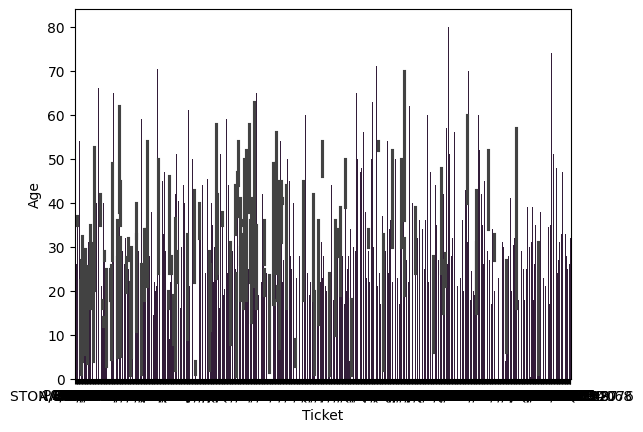

In [41]:
sns.barplot(x=data['Ticket'],y=data['Age'])

<Axes: >

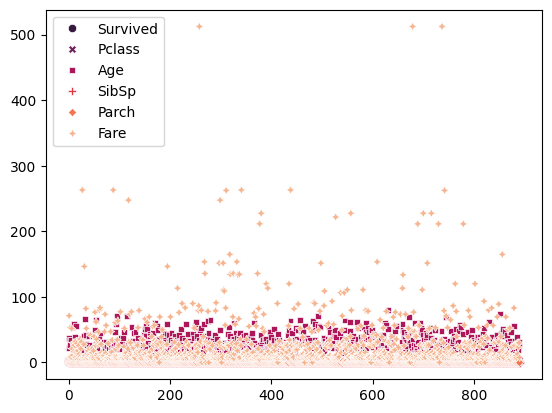

In [42]:
df=data.drop('PassengerId',axis=1)
sns.scatterplot(df)

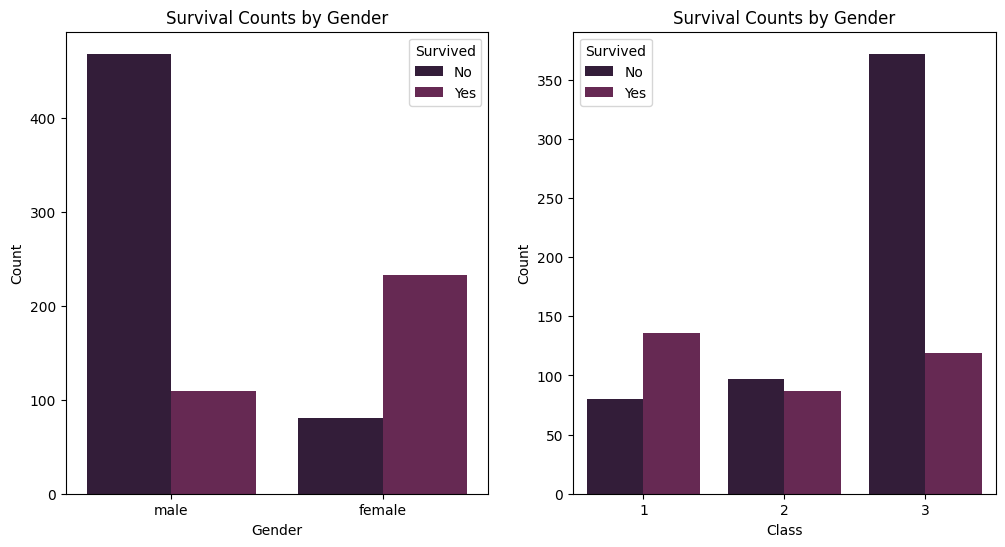

In [43]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(data=data,x='Sex',hue='Survived')
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.subplot(1,2,2)
sns.countplot(data=data,x='Pclass',hue='Survived')
plt.title('Survival Counts by Gender')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])


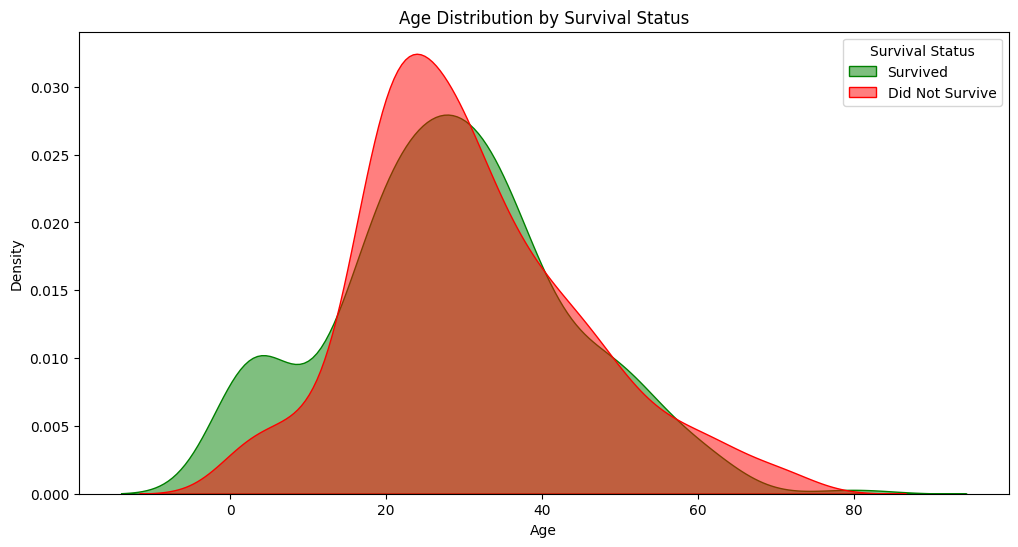

In [44]:
plt.figure(figsize=(12, 6))

# Plot survival distribution by age using KDE plot
sns.kdeplot(data=data[data['Survived'] == 1], x='Age', label='Survived', fill=True, color='green', alpha=0.5)
sns.kdeplot(data=data[data['Survived'] == 0], x='Age', label='Did Not Survive', fill=True, color='red', alpha=0.5)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survival Status')

plt.show()

## Numerical Data Analysis

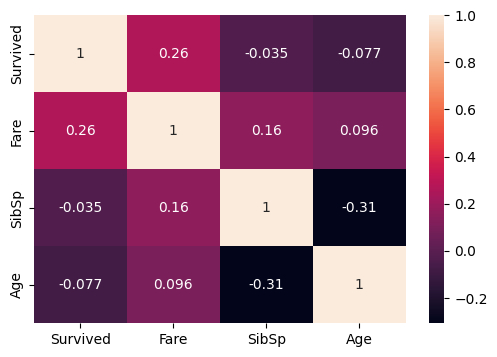

In [45]:
plt.figure(figsize=(6,4))
heatmap=sns.heatmap(data[['Survived','Fare','SibSp','Age']].corr(),annot=True)

## SibSp = No. of Sibling / Sponses aboard the triance

In [46]:
data['SibSp'].nunique()
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

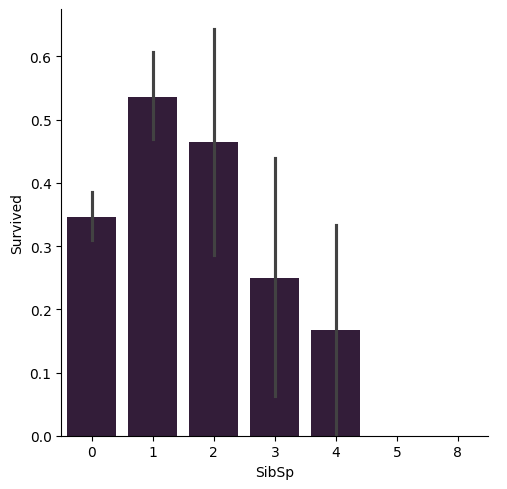

In [47]:
sns.catplot(x='SibSp',y='Survived',data=data,kind='bar')

### Age

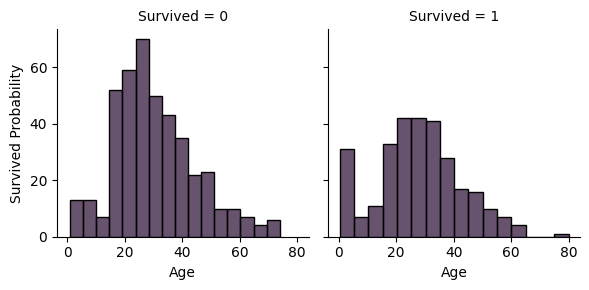

In [48]:
age_visuals=sns.FacetGrid(data,col='Survived')
age_visuals=age_visuals.map(sns.histplot,'Age').set_ylabels("Survived Probability")

### Sex

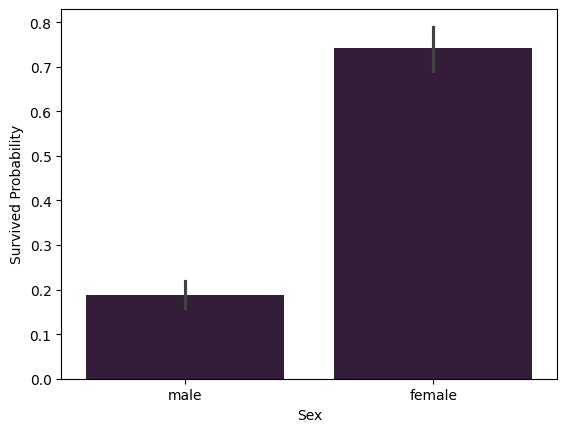

In [49]:
sex_para=sns.barplot(x='Sex',y='Survived',data=data).set_ylabel("Survived Probability")

In [50]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


### Passangers Class

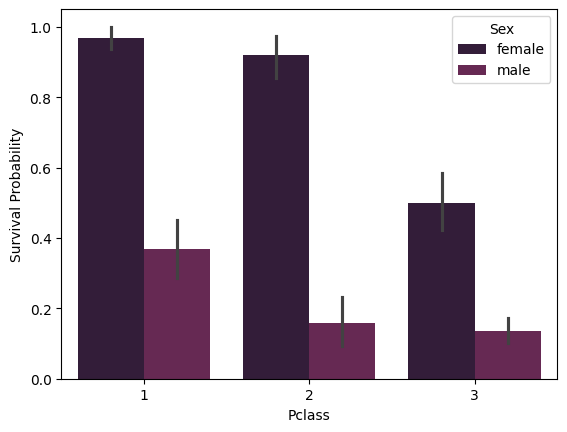

In [51]:
class_role=sns.barplot(x='Pclass',y='Survived',data=data,hue='Sex').set_ylabel("Survival Probability")

### Embarked

In [52]:
data['Embarked'].isnull().sum()

2

In [53]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
data['Embarked']=data['Embarked'].fillna('S')

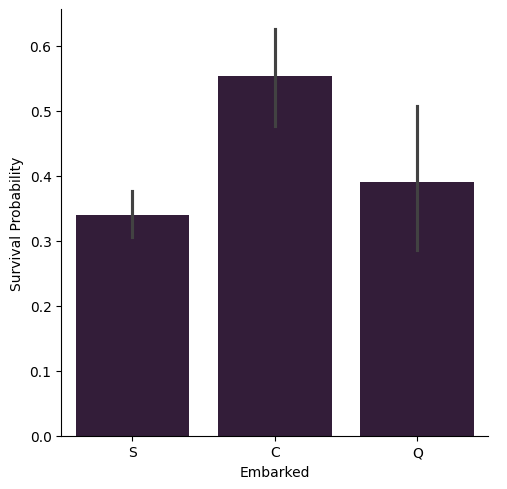

In [55]:
embark=sns.catplot(x='Embarked',y='Survived',data=data,kind='bar').set_ylabels('Survival Probability')

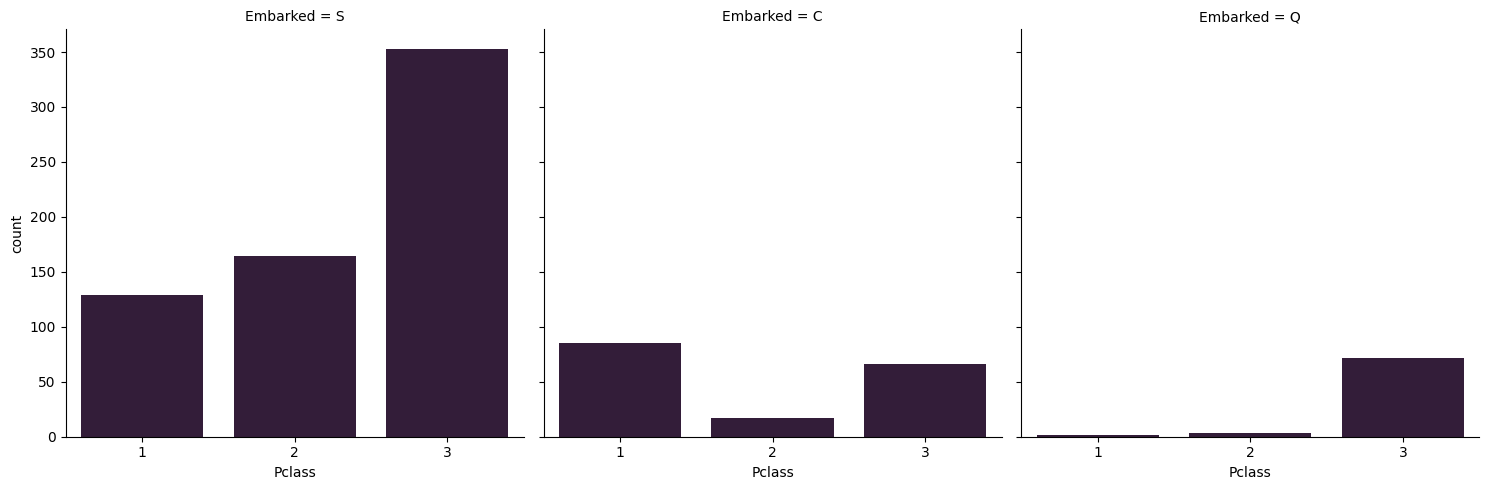

In [56]:
sns.catplot(x='Pclass',col='Embarked',data=data,kind='count')

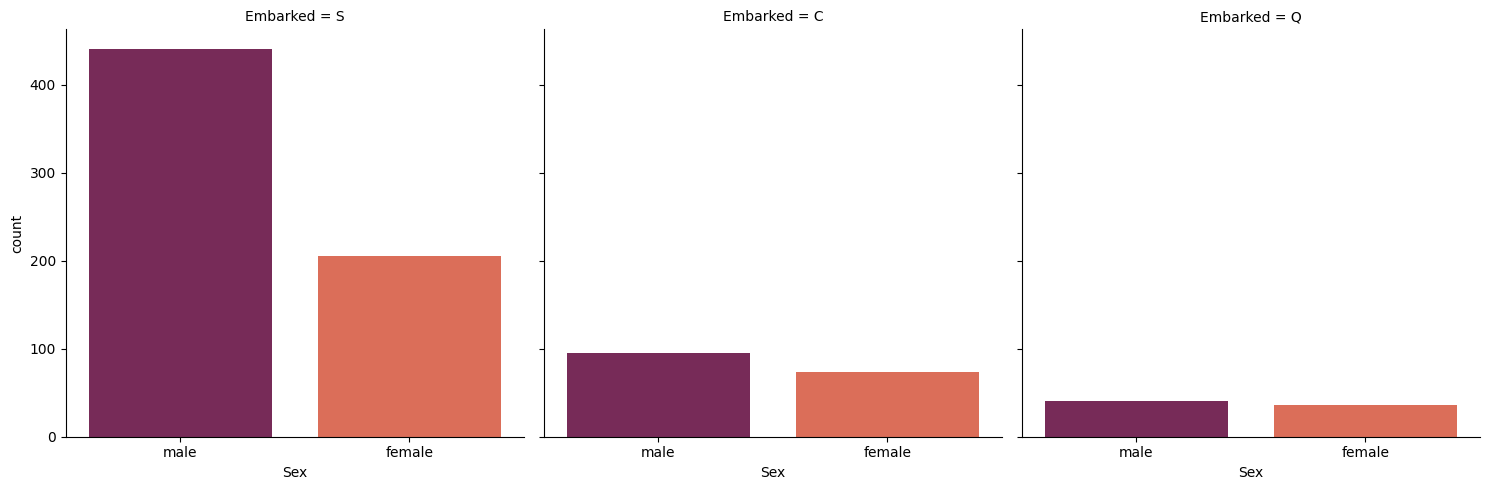

In [57]:
sns.catplot(x='Sex',col='Embarked',data=data,kind='count',palette="rocket")

## Preparing the data

In [58]:
df=pd.read_csv('titanic_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
mean=df['Age'].mean()
std=df['Age'].std()
is_null=df['Age'].isnull().sum()
print(mean," ",std," ",is_null)

29.69911764705882   14.526497332334042   177


In [60]:
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
rand_age

array([17, 37, 40, 42, 36, 43, 38, 33, 33, 26, 36, 17, 39, 43, 42, 28, 22,
       32, 15, 23, 31, 39, 22, 18, 41, 20, 41, 34, 33, 31, 34, 31, 41, 20,
       33, 41, 43, 22, 33, 21, 35, 19, 34, 22, 25, 15, 17, 34, 37, 33, 41,
       21, 27, 22, 33, 16, 22, 42, 20, 20, 16, 40, 37, 41, 34, 28, 22, 18,
       22, 16, 20, 23, 42, 35, 41, 41, 29, 30, 23, 39, 41, 36, 43, 33, 18,
       42, 26, 23, 19, 18, 26, 34, 32, 27, 43, 30, 30, 33, 19, 31, 23, 34,
       38, 32, 27, 22, 38, 31, 25, 20, 36, 27, 33, 21, 36, 36, 38, 27, 38,
       17, 28, 26, 42, 24, 24, 40, 19, 27, 25, 43, 34, 37, 21, 24, 38, 40,
       23, 28, 25, 43, 31, 28, 25, 23, 17, 32, 34, 36, 39, 27, 16, 31, 15,
       28, 16, 33, 18, 37, 30, 42, 23, 27, 22, 30, 16, 20, 42, 28, 28, 33,
       34, 43, 24, 40, 19, 39, 16])

In [61]:
a=df['Age'].copy()
a[a.isnull()]=rand_age
df['Age']=a
df['Age'].isnull().sum()

0

In [62]:
df['Embarked']=df['Embarked'].fillna('S')

In [63]:
df.drop(['PassengerId','Ticket','Name','Cabin'],inplace=True,axis=1)

In [64]:
gender={'male':1,'female':0}
df['Sex']=df['Sex'].map(gender)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [65]:
gender={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(gender)

## Splitting data

In [66]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

## Scalling the data

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

sns.set_palette('rocket')

import warnings 
warnings.filterwarnings('ignore')

In [69]:
rf_classifier=RandomForestClassifier()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier()
svc_classifier=SVC()
lr_classifier=LogisticRegression()

In [70]:
rf_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
lr_classifier.fit(xtrain,ytrain)

LogisticRegression()

In [72]:
rf_classifier_pred=rf_classifier.predict(xtest)
dt_classifier_pred=dt_classifier.predict(xtest)
knn_classifier_pred=knn_classifier.predict(xtest)
svc_classifier_pred=svc_classifier.predict(xtest)
lr_classifier_pred=lr_classifier.predict(xtest)

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(rf_classifier_pred,ytest)

0.17537313432835822

In [74]:
mean_squared_error(dt_classifier_pred,ytest)

0.2537313432835821

In [75]:
mean_squared_error(knn_classifier_pred,ytest)

0.208955223880597

In [76]:
mean_squared_error(svc_classifier_pred,ytest)

0.19029850746268656

In [77]:
mean_squared_error(lr_classifier_pred,ytest)

0.19402985074626866

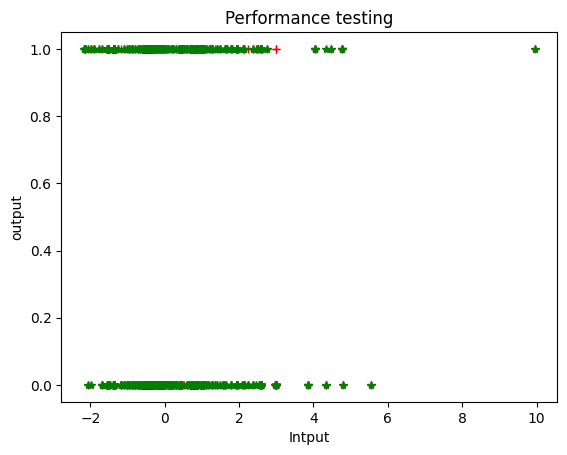

In [88]:
plt.plot(xtest,ytest,"+",color="red")
plt.plot(xtest,rf_classifier_pred,"*",color="green")
plt.title("Performance testing")
plt.xlabel("Intput")
plt.ylabel("output")
plt.show()

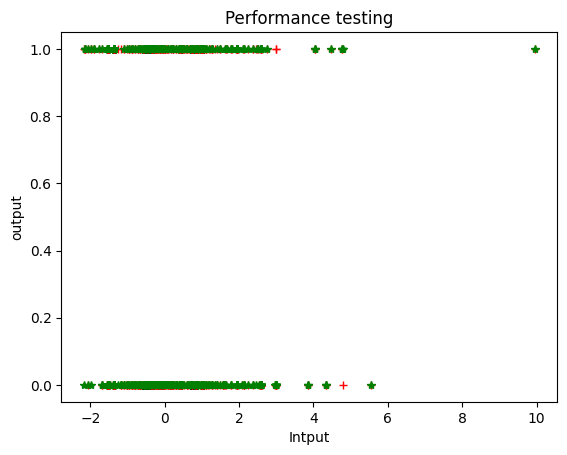

In [82]:
plt.plot(xtest,ytest,"+",color="red")
plt.plot(xtest,knn_classifier_pred,"*",color="green")
plt.title("Performance testing")
plt.xlabel("Intput")
plt.ylabel("output")
plt.show()

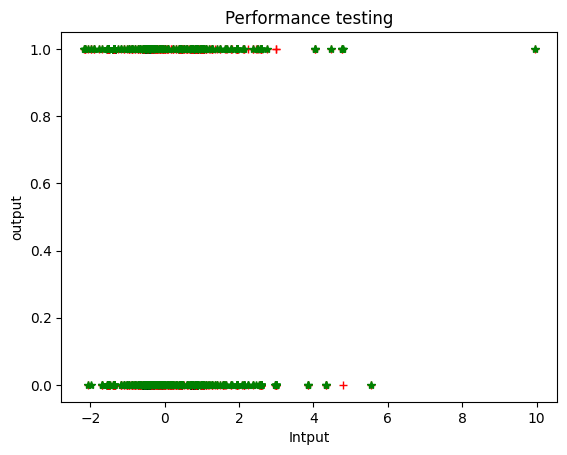

In [83]:
plt.plot(xtest,ytest,"+",color="red")
plt.plot(xtest,svc_classifier_pred,"*",color="green")
plt.title("Performance testing")
plt.xlabel("Intput")
plt.ylabel("output")
plt.show()

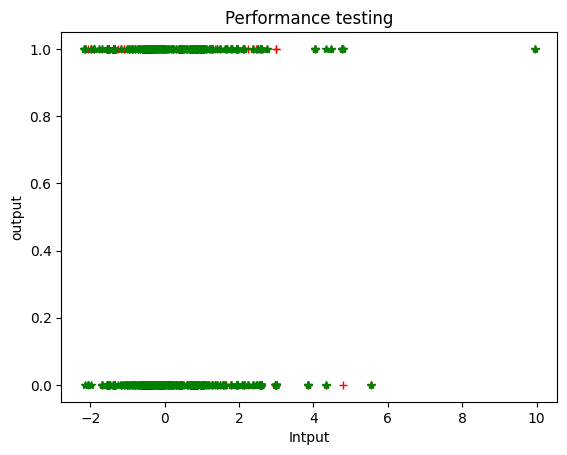

In [84]:
plt.plot(xtest,ytest,"+",color="red")
plt.plot(xtest,dt_classifier_pred,"*",color="green")
plt.title("Performance testing")
plt.xlabel("Intput")
plt.ylabel("output")
plt.show()

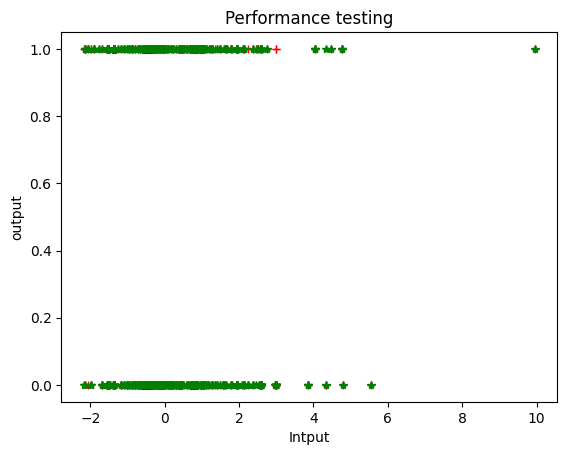

In [85]:
plt.plot(xtest,ytest,"+",color="red")
plt.plot(xtest,lr_classifier_pred,"*",color="green")
plt.title("Performance testing")
plt.xlabel("Intput")
plt.ylabel("output")
plt.show()